# Glauconite detection

In [1]:
data_path = '../data'

In [2]:
import re
import os

# image_names = sorted([path for path in os.listdir(data_path) if 'jpg' in path], key=lambda s: int(re.search(r'\d+', s).group()))
image_names = ['0_color.jpg', '0_monochrome.jpg']

## View sandstone images

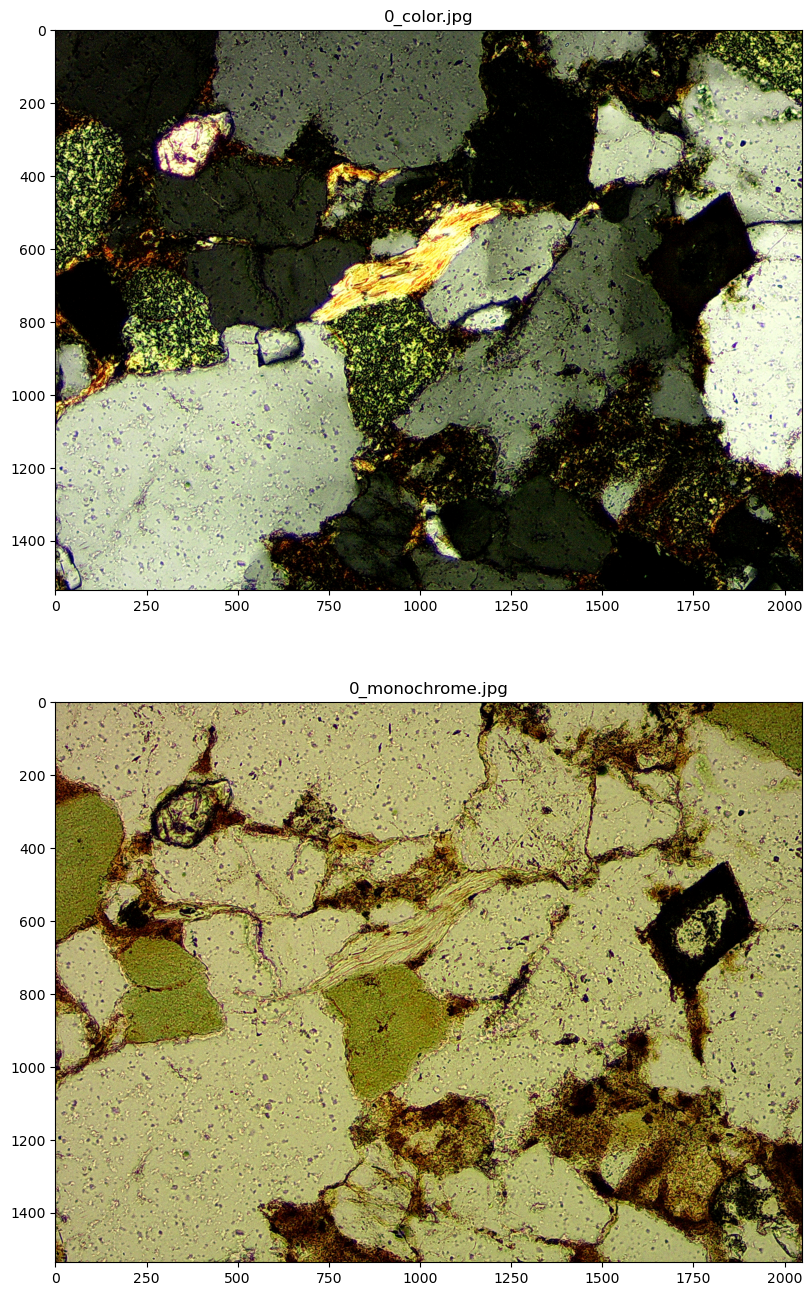

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_count = len(image_names)
fig, axes = plt.subplots(image_count, 1, figsize=(10, 16))

for index, path in enumerate(image_names):
    image = mpimg.imread(os.path.join(data_path, path))
    axes[index].imshow(image)
    axes[index].set_title(path)

plt.show()

## Monochrome image

In [4]:
monochrome_path = '../data/0_monochrome.jpg'

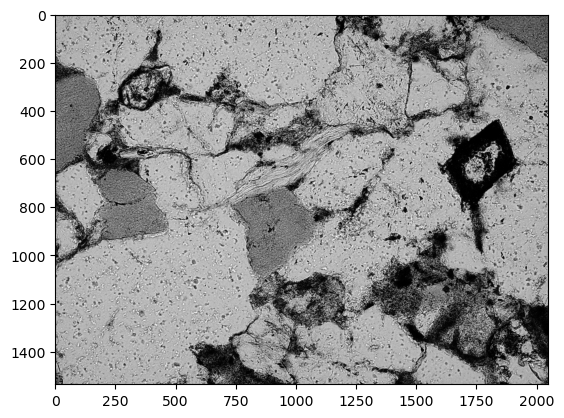

In [5]:
from skimage.io import imread
from skimage.color import rgb2gray

image = imread(monochrome_path)
image = rgb2gray(image)
plt.imshow(image, cmap="gray")

### Threshold

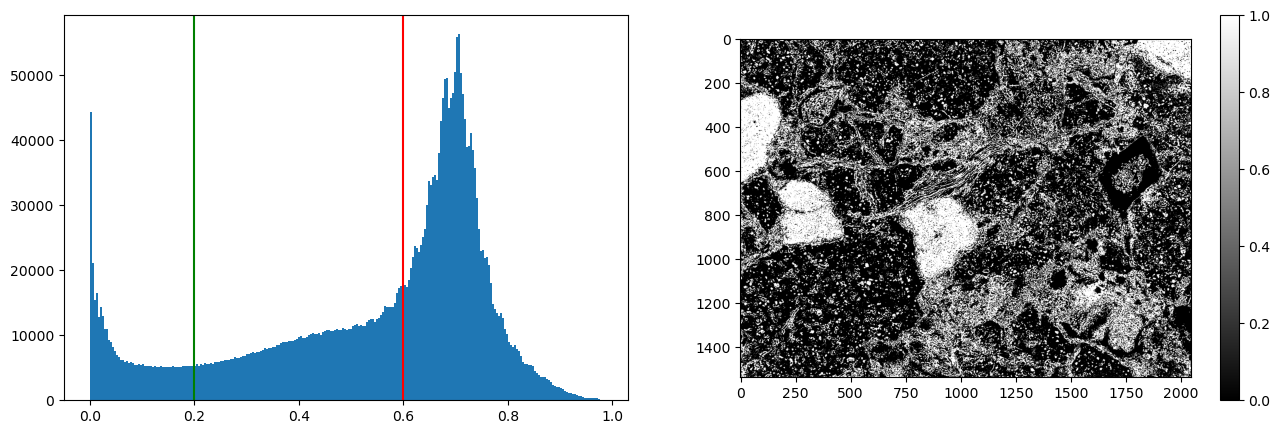

In [90]:
import numpy as np

thresh_down = 0.2
thresh_up = 0.6

binary = np.bitwise_and(image > thresh_down, image < thresh_up)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].hist(image.ravel(), bins=256)
axes[0].axvline(thresh_up, c='r')
axes[0].axvline(thresh_down, c='g')

im = axes[1].imshow(binary, cmap='gray')
fig.colorbar(im)

### Binarization

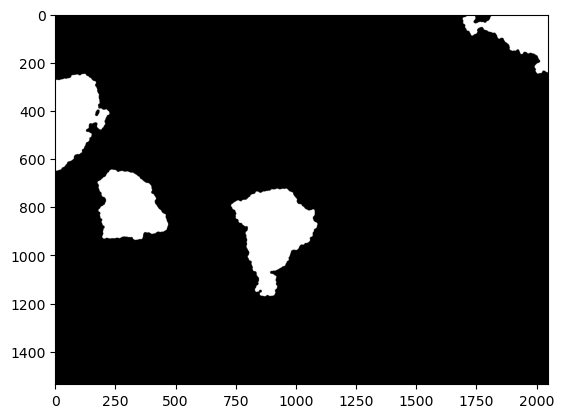

In [96]:
from skimage.morphology import binary_closing, disk, remove_small_holes, binary_erosion, remove_small_objects, \
    binary_dilation, binary_opening

binary_processed = remove_small_holes(binary, 500)
binary_processed = binary_erosion(binary_processed, disk(8))
binary_processed = remove_small_objects(binary_processed, 25000)
binary_processed = binary_dilation(binary_processed, disk(6))
binary_processed = binary_closing(binary_processed, disk(6))

plt.imshow(binary_processed, cmap="gray")

### Result

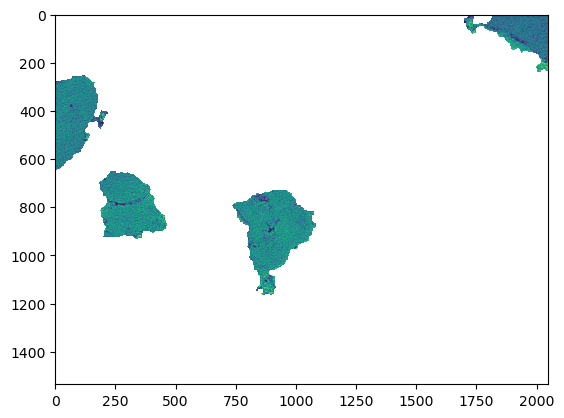

In [97]:
import numpy as np

plt.imshow(np.ma.array(image, mask=~binary_processed))

## Glauconite Area

In [99]:
glauconite_pixels = np.sum(binary_processed)
glauconite_area = glauconite_pixels / 3640 ** 2

In [100]:
print(f'Number of pixels containing quartz: {glauconite_pixels} px')
print(f'Quartz area:                        {glauconite_area} mm^2')

Number of pixels containing quartz: 245486 px
Quartz area:                        0.018527804612969448 mm^2
